In [8]:
import pandas as pd
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50
pd.options.mode.chained_assignment = None

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("PAT_FLAGS.csv")
print(df.shape)

(551127, 722)


In [11]:
# Replace standardize zeros with Nan. Important for count purposes. 
df.replace(0, np.nan, inplace=True)

In [12]:
k = input("Please enter the clinical concept code: ")

# Function to get specific clinical concept and change header
def count_table(df, k):
    flag = "_FLAG"
    preTBI = "_DATE_MIN_PRE"
    postTBI = "_DATE_MIN_POST"
    dod = "_DATE_MIN_DOD"
    va = "_DATE_MIN_VA"

    kflag = k + flag
    kpre = k + preTBI
    kpost = k + postTBI
    kdod = k + dod
    kva = k + va
    
    df = df[[kflag, kpre, kpost, kdod, kva]]
    
    df = df.rename(columns={kflag: "Flag", kpre: "Pre-TBI",
                           kpost: 'Post-TBI',
                           kdod: "DOD",
                           kva: "VA"})

    return df

# Function to generate table of counts and percent. 
def transform_dataframe(df1):
    column_names = []
    n_values = []
    percentage_values = []

    for column in df1.columns:
        column_names.append(column)
        valid_cells = df1[column][(df1[column] != 0) & (~df1[column].isnull())].count()
        n_values.append(valid_cells)
        percentage_values.append(valid_cells / len(df1[column]) * 100)

    data = {
        "Column": column_names,
        "n": n_values,
        "%": percentage_values
    }

    df2 = pd.DataFrame(data)

    return df2

df1 = count_table(df, k)
df2 = transform_dataframe(df1)
display(df2.style.hide_index())


Please enter the clinical concept code: A4


Column,n,%
Flag,125,0.022681
Pre-TBI,1,0.000181
Post-TBI,124,0.022499
DOD,125,0.022681
VA,0,0.000000


In [13]:
clinDict = {"A1": "AcuteStressReaction",
    "A2": "AdjustmentDisorder",
    "A3":"Alcohol",
    "A4":"AntisocialBehavior",
    "A5":"AttentionDeficit",
    "A6":"BipolarI",
    "A7":"BipolarII",
    "A8":"Cannabis",
    "A9":"Cocaine",
    "A10":"ConductDisorder",
    "A11":"ConversionDisorder",
    "A12":"DissociativeDisorder",
    "A13":"EatingDisorder",
    "A14":"ExplosiveDisorder",
    "A15":"FactitiousDisorder",
    "A16":"GeneralizedAnxiety",
    "A17":"TobaccoUse",
    "A18":"HomicidalIdeation",
    "A19":"ImpulseControl",
    "A20":"MajorDepressive",
    "A21":"ObsessiveCompulsive",
    "A22":"Opioid",
    "A23":"FLAG_Other",
    "A24":"OtherAnxiety",
    "A25":"OtherBipolar",
    "A26":"OtherDepressive",
    "A27":"OtherManic",
    "A28": "OtherMood",
    "A29":"OtherPsychosis",
    "A30":"OtherStress",
    "A31":"PainDisorder",
    "A32":"PanicDisorder",
    "A33":"AdultAbuse",
    "A34":"Combat",
    "A35":"Trauma",
    "A36":"PersonalityDisorder",
    "A37":"PhobicDisorder",
    "A38":"PTSD",
    "A39":"Schizophrenia",
    "A40":"SelfHarm",
    "A41":"SomatoformDisorder",
    "A42":"OtherSubstance",
    "A43":"TobaccoSubstance",
    "A44":"SuicideAttempt",
    "A45":"SuicideIdeation"}


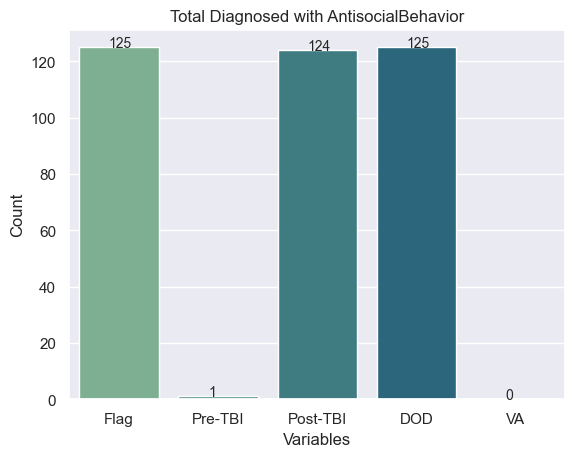

In [16]:
# NEEDS MORE WORK TO DO 
sns.set(style="darkgrid", color_codes=True)
plot = sns.barplot(x="Column", y='n', palette="crest", data=df2, label='small')
plot.set(xlabel ="Variables", ylabel = "Count", title="Total Diagnosed with " + clinDict[k])
total = float(len(df2))
for i, p in enumerate(plot.patches):
    number = '{}'.format(df2["n"][i])
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() 
    plot.annotate(number, (x, y), size = 10)
plt.show()